In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')

In [ ]:
df.head().T                                        

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['RainTomorrow'].isnull().sum()

3267

In [ ]:
df = df.dropna(subset=['RainTomorrow'])

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


#Class Distribution

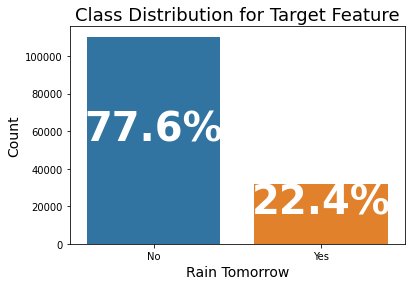

In [ ]:
axis = sns.countplot(x='RainTomorrow', data=df)
axis.set_title('Class Distribution for Target Feature', size=18)

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2,
             s = f"{np.round(patch.get_height()/len(df)*100, 1)}%",
             ha = 'center', size = 40, rotation = 0, weight = 'bold',
             color = 'white')
axis.set_xlabel('Rain Tomorrow', size=14)
axis.set_ylabel('Count', size=14)
plt.show()

In [ ]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

df['month'] = df['Date'].dt.month
df = encode(df,'month',12)

df['day'] = df['Date'].dt.day
df = encode(df,'day',31)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.8, random_state=101, 
                                     stratify = df['RainTomorrow'])

In [ ]:
df_train

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,month_sin,month_cos,day,day_sin,day_cos
130073,2009-02-21,Hobart,11.3,23.3,5.6,4.6,12.1,SSW,54.0,NE,S,7.0,28.0,72.0,64.0,1016.4,1015.9,1.0,5.0,16.5,18.3,Yes,No,2,8.660254e-01,0.500000,21,-8.978045e-01,-0.440394
4460,2013-01-21,BadgerysCreek,19.2,29.2,1.4,NaN,NaN,ENE,31.0,ESE,NNE,4.0,15.0,91.0,54.0,1016.0,1012.4,NaN,NaN,21.1,27.6,Yes,No,1,5.000000e-01,0.866025,21,-8.978045e-01,-0.440394
103327,2011-02-14,Nuriootpa,12.5,27.1,0.0,7.0,9.4,SE,39.0,E,SE,11.0,15.0,69.0,28.0,1021.9,1018.8,6.0,7.0,16.2,25.8,No,No,2,8.660254e-01,0.500000,14,2.993631e-01,-0.954139
80325,2015-08-23,Watsonia,5.2,16.2,0.0,3.0,7.7,SW,28.0,NE,SW,2.0,15.0,95.0,54.0,1020.3,1018.7,7.0,6.0,10.3,15.6,No,No,8,-8.660254e-01,-0.500000,23,-9.987165e-01,-0.050649
76265,2012-08-08,Portland,9.1,14.9,3.0,4.0,7.4,W,70.0,WNW,WNW,28.0,37.0,89.0,64.0,1011.2,1010.8,7.0,4.0,12.2,14.2,Yes,Yes,8,-8.660254e-01,-0.500000,8,9.987165e-01,-0.050649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,2016-01-20,Tuggeranong,15.5,34.9,0.0,NaN,NaN,WNW,56.0,NaN,WNW,0.0,28.0,60.0,22.0,1012.8,1009.1,NaN,NaN,20.8,32.1,No,No,1,5.000000e-01,0.866025,20,-7.907757e-01,-0.612106
76832,2014-04-26,Portland,8.1,15.1,4.4,3.8,7.5,W,52.0,SW,SSW,22.0,19.0,66.0,60.0,1013.6,1017.4,8.0,7.0,13.4,13.2,Yes,No,4,8.660254e-01,-0.500000,26,-8.486443e-01,0.528964
32569,2014-11-18,Sydney,18.6,26.7,0.0,8.0,11.7,SSE,43.0,W,SSE,20.0,24.0,60.0,45.0,1016.7,1016.4,3.0,1.0,22.3,25.2,No,No,11,-5.000000e-01,0.866025,18,-4.853020e-01,-0.874347
93310,2008-12-31,Townsville,24.1,31.2,31.2,5.2,8.3,NNE,37.0,N,NE,13.0,13.0,76.0,67.0,1007.4,1003.7,7.0,7.0,28.7,30.7,Yes,Yes,12,-2.449294e-16,1.000000,31,-2.449294e-16,1.000000


In [ ]:
df_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,month_sin,month_cos,day,day_sin,day_cos
13783,2013-12-11,Moree,18.2,34.2,0.0,10.6,7.0,WSW,50.0,SSE,WSW,11.0,24.0,24.0,14.0,1008.1,1004.9,5.0,7.0,27.8,32.7,No,No,12,-2.449294e-16,1.000000e+00,11,7.907757e-01,-0.612106
110478,2014-05-20,Albany,13.6,17.5,4.2,2.6,0.0,NaN,NaN,S,NNW,9.0,11.0,94.0,78.0,1017.2,1013.1,8.0,8.0,16.6,16.4,Yes,Yes,5,5.000000e-01,-8.660254e-01,20,-7.907757e-01,-0.612106
41575,2014-10-28,Williamtown,12.8,31.5,0.0,7.4,9.8,WNW,50.0,N,WNW,11.0,30.0,64.0,10.0,1013.4,1008.5,2.0,3.0,20.8,30.6,No,No,10,-8.660254e-01,5.000000e-01,28,-5.712682e-01,0.820763
102736,2009-07-03,Nuriootpa,NaN,13.7,8.0,0.0,3.1,WSW,46.0,WSW,W,26.0,26.0,97.0,84.0,1020.4,1021.0,8.0,7.0,10.5,13.2,Yes,Yes,7,-5.000000e-01,-8.660254e-01,3,5.712682e-01,0.820763
26703,2016-03-19,Penrith,11.6,25.4,0.8,NaN,NaN,ESE,30.0,NE,NNE,2.0,9.0,56.0,30.0,NaN,NaN,NaN,NaN,17.7,24.4,No,No,3,1.000000e+00,6.123234e-17,19,-6.513725e-01,-0.758758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27821,2010-10-17,Richmond,3.7,23.9,0.0,NaN,NaN,WSW,41.0,NNE,WSW,2.0,6.0,58.0,34.0,1013.7,1010.9,NaN,NaN,13.2,23.2,No,No,10,-8.660254e-01,5.000000e-01,17,-2.993631e-01,-0.954139
91970,2013-11-24,GoldCoast,19.3,29.2,16.6,NaN,NaN,NW,39.0,NNW,N,24.0,24.0,73.0,99.0,1006.5,1002.4,NaN,NaN,26.1,23.9,Yes,Yes,11,-5.000000e-01,8.660254e-01,24,-9.884683e-01,0.151428
14746,2016-07-31,Moree,0.9,19.0,0.0,NaN,NaN,SW,28.0,ENE,SW,11.0,20.0,80.0,39.0,1022.4,1019.1,NaN,NaN,8.4,17.8,No,No,7,-5.000000e-01,-8.660254e-01,31,-2.449294e-16,1.000000
101713,2015-03-09,MountGambier,12.6,20.4,0.2,3.2,4.6,W,41.0,NW,W,11.0,9.0,85.0,49.0,1014.0,1015.2,5.0,7.0,16.7,19.3,No,No,3,1.000000e+00,6.123234e-17,9,9.680771e-01,-0.250653


#Cleaning Categorical Feature

In [ ]:
cat_feature = [feature for feature in df_train.columns if df[feature].dtype=='object']
df_train[cat_feature].isnull().mean()*100

Location        0.000000
WindGustDir     6.579988
WindDir9am      7.022171
WindDir3pm      2.657489
RainToday       0.981064
RainTomorrow    0.000000
dtype: float64

In [ ]:
for feature in cat_feature:
    df_train[feature].fillna(df_train[feature].mode()[0], inplace = True)
    df_test[feature].fillna(df_test[feature].mode()[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
cat_feature = [feature for feature in df_train.columns if df[feature].dtype=='object']
df_train[cat_feature].isnull().mean()*100

Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64

#Cleaning Numerical Features

In [ ]:
num_feature = df.describe().columns.to_list()
df_train[num_feature].isnull().mean()*100

MinTemp           0.449215
MaxTemp           0.229442
Rainfall          0.981064
Evaporation      42.819593
Sunshine         47.701180
WindGustSpeed     6.536913
WindSpeed9am      0.954692
WindSpeed3pm      1.854880
Humidity9am       1.257978
Humidity3pm       2.531779
Pressure9am       9.839654
Pressure3pm       9.823830
Cloud9am         37.748123
Cloud3pm         40.114633
Temp9am           0.638219
Temp3pm           1.904109
month             0.000000
month_sin         0.000000
month_cos         0.000000
day               0.000000
day_sin           0.000000
day_cos           0.000000
dtype: float64

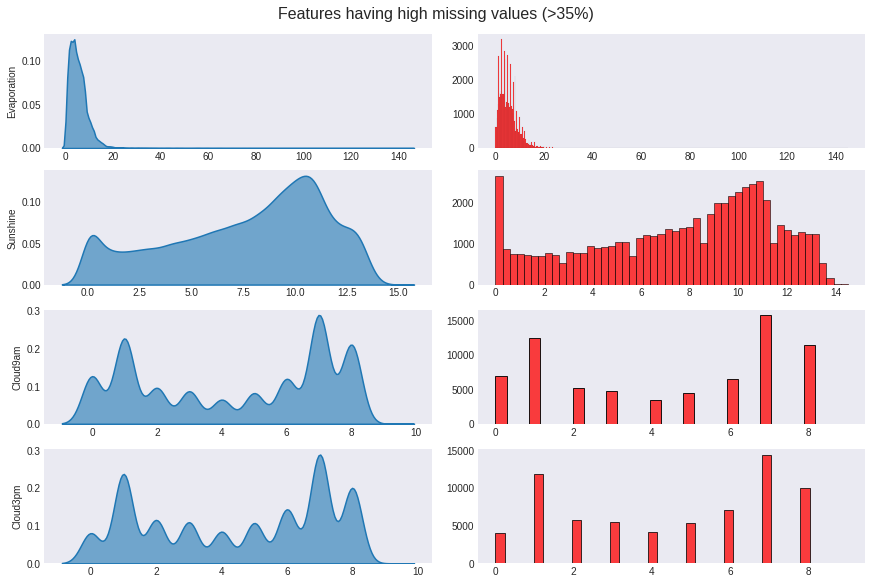

In [ ]:
cols = ['Evaporation','Sunshine','Cloud9am','Cloud3pm']
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(4,2, figsize = (12,8), constrained_layout = True)

for i, num_var in enumerate(cols): 
    sns.kdeplot(data = df_train, x = num_var, ax = ax[i][0],
                fill = True, alpha = 0.6, linewidth = 1.5)
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    
    sns.histplot(data = df_train, x = num_var, ax = ax[i][1], color='red')
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
    
fig.suptitle('Features having high missing values (>35%)', size = 16);



##### Sunshine, Cloud9am, Cloud3pm are filled by median since they are distributed data and Evoporation is filled using mean

In [ ]:
for dataframe in [df_train, df_test]:
    for feature in ['Sunshine','Cloud9am','Cloud3pm']:
        dataframe[feature].fillna(dataframe[feature].median(), inplace=True)
        
    dataframe['Evaporation'].fillna(dataframe['Evaporation'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
num_feature = df.describe().columns.to_list()
df_train[num_feature].isnull().mean()*100

MinTemp          0.449215
MaxTemp          0.229442
Rainfall         0.981064
Evaporation      0.000000
Sunshine         0.000000
WindGustSpeed    6.536913
WindSpeed9am     0.954692
WindSpeed3pm     1.854880
Humidity9am      1.257978
Humidity3pm      2.531779
Pressure9am      9.839654
Pressure3pm      9.823830
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.638219
Temp3pm          1.904109
month            0.000000
month_sin        0.000000
month_cos        0.000000
day              0.000000
day_sin          0.000000
day_cos          0.000000
dtype: float64

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results

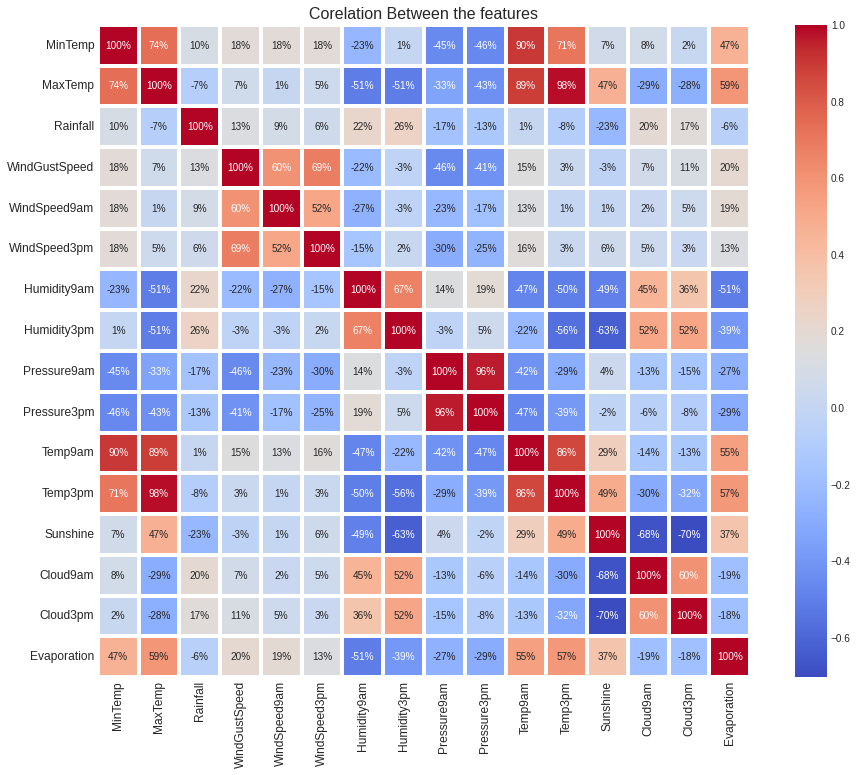

In [ ]:
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm',
              'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']
plt.figure(figsize=(16,12))
axis=sns.heatmap(df[numeric_col].corr(), cmap='coolwarm',annot=True, linewidths=3, square=True, fmt='.0%')

axis.set_title('Corelation Between the features', size=16)
axis.set_xticklabels(numeric_col, fontsize=12)
axis.set_yticklabels(numeric_col, fontsize=12, rotation=0);

###### MinTemp and Temp9am highly correlated.
###### MinTemp and Temp3pm highly correlated.
###### MaxTemp and Temp9am highly correlated.

######  MaxTemp and Temp3pm highly correlated.
###### Temp3pm and Temp9am highly correlated.
###### Humidity9am and Humidity3pm highly correlated.

In [ ]:
# Droping the columns
for dataframe in [df_train, df_test]:
    dataframe.drop(['Temp3pm', 'Pressure3pm', 'Temp9am'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Checking for outliers

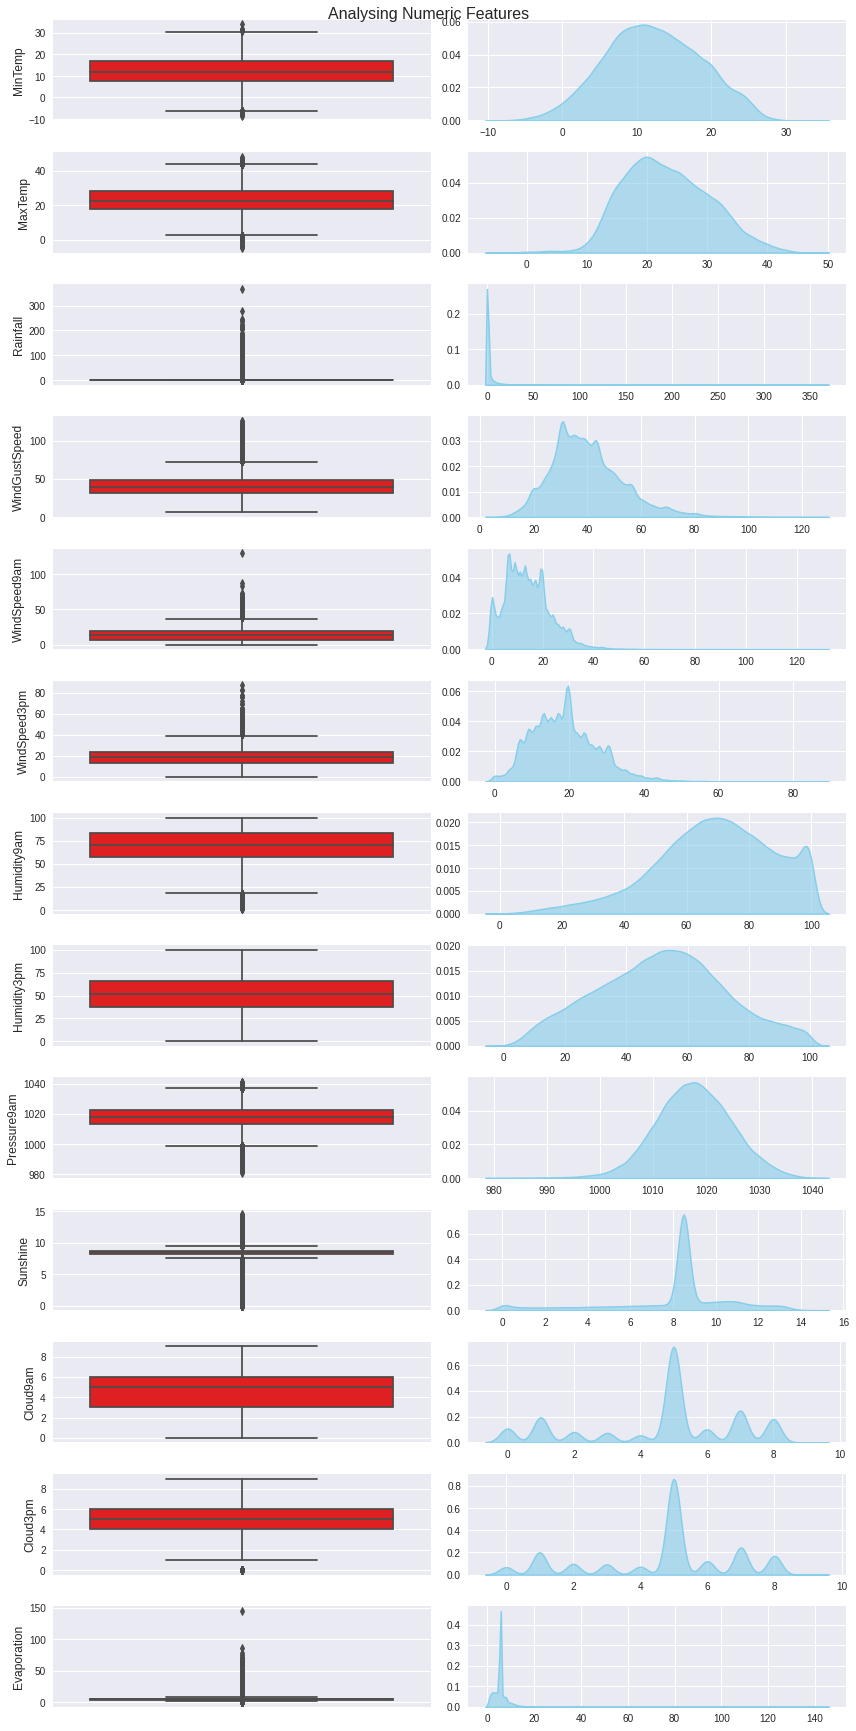

In [ ]:
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
               'Humidity9am','Humidity3pm', 'Pressure9am', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

plt.style.use('seaborn')
fig, axis = plt.subplots(13, 2, figsize = (12, 24))
for i, num_var in enumerate(numeric_col):
    
    # Checking for the outliers using boxplot
    sns.boxplot(y = num_var, data = df_train, ax = axis[i][0], color = 'red')
    
    # Checking for the distribution using kdeplot
    sns.kdeplot(x = num_var, data = df_train, ax = axis[i][1], color = 'skyblue',
               fill = True, alpha = 0.6, linewidth = 1.5)
    
    axis[i][0].set_ylabel(f"{num_var}", fontsize = 12)
    axis[i][0].set_xlabel(None)
    axis[i][1].set_xlabel(None)
    axis[i][1].set_ylabel(None)

fig.suptitle('Analysing Numeric Features', fontsize = 16, y = 1)
plt.tight_layout()

In [ ]:
threshold = 0.05
for col in numeric_col:
    
    # Lower and upper threshold
    lower_threshold = df_train[col].quantile(threshold)
    upper_threshold = df_train[col].quantile(1-threshold)
    
    # Dropping the values below lower threshold and beyond upper threshold
    df_train = df_train[(df_train[col]>=lower_threshold) & (df_train[col]<=upper_threshold)]
    df_test = df_test[(df_test[col]>=lower_threshold) & (df_test[col]<=upper_threshold)]

In [ ]:
df_train.shape

(33382, 26)

In [ ]:
df_train.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,month,month_sin,month_cos,day,day_sin,day_cos
130073,2009-02-21,Hobart,11.3,23.3,5.6,4.600000,12.1,SSW,54.0,NE,S,7.0,28.0,72.0,64.0,1016.4,1.0,5.0,Yes,No,2,8.660254e-01,0.500000,21,-0.897805,-0.440394
4460,2013-01-21,BadgerysCreek,19.2,29.2,1.4,5.472823,8.5,ENE,31.0,ESE,NNE,4.0,15.0,91.0,54.0,1016.0,5.0,5.0,Yes,No,1,5.000000e-01,0.866025,21,-0.897805,-0.440394
103327,2011-02-14,Nuriootpa,12.5,27.1,0.0,7.000000,9.4,SE,39.0,E,SE,11.0,15.0,69.0,28.0,1021.9,6.0,7.0,No,No,2,8.660254e-01,0.500000,14,0.299363,-0.954139
80325,2015-08-23,Watsonia,5.2,16.2,0.0,3.000000,7.7,SW,28.0,NE,SW,2.0,15.0,95.0,54.0,1020.3,7.0,6.0,No,No,8,-8.660254e-01,-0.500000,23,-0.998717,-0.050649
142255,2017-05-08,Darwin,22.4,33.0,0.0,6.800000,10.7,E,44.0,ESE,E,13.0,24.0,57.0,38.0,1013.5,2.0,3.0,No,No,5,5.000000e-01,-0.866025,8,0.998717,-0.050649
75307,2009-11-24,Portland,7.4,19.4,0.0,5.400000,11.7,WSW,39.0,WNW,W,20.0,26.0,75.0,63.0,1026.1,3.0,1.0,No,No,11,-5.000000e-01,0.866025,24,-0.988468,0.151428
10182,2012-02-29,CoffsHarbour,20.3,30.9,0.0,6.200000,10.6,NNE,33.0,SSE,NE,4.0,15.0,62.0,63.0,1012.6,5.0,4.0,No,No,2,8.660254e-01,0.500000,29,-0.394356,0.918958
11864,2016-12-05,CoffsHarbour,20.5,30.6,0.0,5.472823,8.5,NW,59.0,NNE,NE,28.0,31.0,66.0,72.0,1011.9,5.0,7.0,No,Yes,12,-2.449294e-16,1.000000,5,0.848644,0.528964
89998,2016-10-27,Cairns,22.6,31.3,0.0,5.472823,8.5,ESE,37.0,SSE,ESE,20.0,24.0,57.0,53.0,1015.6,4.0,5.0,No,No,10,-8.660254e-01,0.500000,27,-0.724793,0.688967
51145,2014-12-22,Tuggeranong,14.3,32.6,0.0,5.472823,8.5,NW,44.0,NW,NNE,6.0,20.0,64.0,58.0,1015.6,5.0,5.0,No,Yes,12,-2.449294e-16,1.000000,22,-0.968077,-0.250653


# Feature Transformation

In [ ]:
df_train.RainTomorrow

130073    No
4460      No
103327    No
80325     No
142255    No
          ..
117712    No
91565     No
3516      No
76832     No
32569     No
Name: RainTomorrow, Length: 33382, dtype: object

In [ ]:
df_train['RainTomorrow'] = df_train['RainTomorrow'].map(dict({'Yes':1, 'No':0}))
df_test['RainTomorrow'] = df_test['RainTomorrow'].map(dict({'Yes':1, 'No':0}))

In [ ]:
# Dropping the features not required 
df_train.drop(['Date', 'day', 'month'], axis = 1 ,inplace = True)
df_test.drop(['Date', 'day', 'month'], axis = 1 ,inplace = True)

In [ ]:
y_train = df_train.pop('RainTomorrow')
X_train = df_train

y_test = df_test.pop('RainTomorrow')
X_test = df_test

In [ ]:
# One hot encoding for categorical features
X_train = pd.get_dummies(X_train, drop_first = True).reset_index(drop = True)
X_test = pd.get_dummies(X_test, drop_first = True).reset_index(drop = True)

In [ ]:
# Getting the categorical columns
numeric_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
               'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm',
               'month_sin', 'month_cos', 'day_sin', 'day_cos']

categorical_col = [i for i in X_train.columns if i not in numeric_col]

In [ ]:
#Scaling Data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scale = pd.DataFrame(sc.fit_transform(X_train[numeric_col]), columns=numeric_col)
X_test_scale = pd.DataFrame(sc.fit_transform(X_test[numeric_col]), columns=numeric_col)

In [ ]:
# Creating final train and test data
X_train_final = pd.concat([X_train_scale, X_train[categorical_col]], axis = 1)
X_test_final = pd.concat([X_test_scale, X_test[categorical_col]], axis = 1)

In [ ]:
X_train_final.head(10)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,month_sin,month_cos,day_sin,day_cos,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,-0.223946,-0.006642,2.489328,-0.309306,2.028568,1.889862,-1.018879,1.507455,0.320939,0.953814,-0.483629,-1.867112,0.187018,1.132601,0.724644,-1.246138,-0.592680,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1.354269,1.193017,0.341147,0.287658,0.042965,-0.731996,-1.492031,-0.576658,1.837143,0.241293,-0.566766,0.147121,0.187018,0.634507,1.265041,-1.246138,-0.592680,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0.015783,0.766020,-0.374913,1.332164,0.539366,0.179955,-0.388010,-0.576658,0.081538,-1.611262,0.659502,0.650680,1.243903,1.132601,0.724644,0.430933,-1.326826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-1.442567,-1.450298,-0.374913,-1.403619,-0.398280,-1.073977,-1.807466,-0.576658,2.156344,0.241293,0.326955,1.154238,0.715460,-1.224406,-0.751750,-1.387502,-0.035732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.993546,1.965678,-0.374913,1.195375,1.256389,0.749924,-0.072575,0.866189,-0.876064,-0.898741,-1.086371,-1.363554,-0.869867,0.634507,-1.292147,1.410634,-0.035732,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-1.003065,-0.799636,-0.374913,0.237851,1.807945,0.179955,1.031447,1.186822,0.560339,0.882562,1.532439,-0.859995,-1.926753,-0.726312,1.265041,-1.373146,0.253038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,1.574020,1.538681,-0.374913,0.785008,1.201233,-0.504008,-1.492031,-0.576658,-0.477063,0.882562,-1.273429,0.147121,-0.341425,1.132601,0.724644,-0.540874,1.349844,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [ ]:
X_train_final.shape, X_test_final.shape , y_train.shape, y_test.shape

((33382, 106), (8232, 106), (33382,), (8232,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#nn

In [ ]:
classifier_rf = RandomForestClassifier(n_estimators=1000)
classifier_rf.fit(X_train_final,y_train)
y_rf=classifier_rf.predict(X_test_final)

In [ ]:
print(classification_report(y_test, y_rf))
print('Accuracy Score : ',accuracy_score(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7023
           1       0.73      0.13      0.22      1209

    accuracy                           0.87      8232
   macro avg       0.80      0.56      0.57      8232
weighted avg       0.85      0.87      0.82      8232

Accuracy Score :  0.8650388726919339


In [ ]:
print(confusion_matrix(y_test, y_rf))

[[6965   58]
 [1053  156]]


In [ ]:
y_test

27364     0
132495    0
57139     0
113498    1
122074    1
         ..
80792     0
49139     0
36256     0
101713    0
66349     0
Name: RainTomorrow, Length: 8232, dtype: int64

In [ ]:
y_rf

array([0, 0, 0, ..., 0, 0, 0])

#Training ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model=Sequential()
model.add(Dense(1024, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dense(512, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dense(256, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              109568    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 50
batch_size = 64
history = model.fit(X_train_final, y_train, 
                    batch_size=batch_size,validation_data=(X_test_final,y_test), 
                    epochs=epochs, callbacks=[early_stopping], validation_split=0.3)

Epoch 1/50
366/366 [==============================] - 7s 17ms/step - loss: 0.3469 - accuracy: 0.8608 - val_loss: 0.3198 - val_accuracy: 0.8734
Epoch 2/50
366/366 [==============================] - 6s 16ms/step - loss: 0.3230 - accuracy: 0.8717 - val_loss: 0.3250 - val_accuracy: 0.8764
Epoch 3/50
366/366 [==============================] - 6s 16ms/step - loss: 0.3038 - accuracy: 0.8792 - val_loss: 0.3217 - val_accuracy: 0.8732
Epoch 4/50
366/366 [==============================] - 6s 16ms/step - loss: 0.2892 - accuracy: 0.8836 - val_loss: 0.3318 - val_accuracy: 0.8740
Epoch 5/50
366/366 [==============================] - 6s 16ms/step - loss: 0.2721 - accuracy: 0.8923 - val_loss: 0.3331 - val_accuracy: 0.8739
Epoch 6/50
366/366 [==============================] - 6s 16ms/step - loss: 0.2512 - accuracy: 0.8972 - val_loss: 0.3612 - val_accuracy: 0.8765
Epoch 7/50
366/366 [==============================] - 6s 17ms/step - loss: 0.2260 - accuracy: 0.9079 - val_loss: 0.4151 - val_accuracy: 0.8699

#Ann with correction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',mode='min',verbose=3,patience=25)

In [ ]:
model=Sequential()
model.add(Dense(1024, kernel_initializer = 'random_normal', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dense(512, kernel_initializer = 'random_normal', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dense(256, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer = 'uniform', activation='relu',input_dim = X_train_final.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              109568    
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                

In [ ]:
# from tensorflow import keras
# opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 50
batch_size = 64
history = model.fit(X_train_final, y_train, 
                    batch_size=batch_size,validation_data=(X_test_final,y_test), 
                    epochs=epochs, callbacks=[early_stopping], validation_split=0.3)

Epoch 1/50
366/366 [==============================] - 7s 17ms/step - loss: 0.3484 - accuracy: 0.8607 - val_loss: 0.3311 - val_accuracy: 0.8733
Epoch 2/50
366/366 [==============================] - 6s 16ms/step - loss: 0.3189 - accuracy: 0.8740 - val_loss: 0.3201 - val_accuracy: 0.8750
Epoch 3/50
366/366 [==============================] - 6s 16ms/step - loss: 0.3025 - accuracy: 0.8776 - val_loss: 0.3252 - val_accuracy: 0.8767
Epoch 4/50
366/366 [==============================] - 6s 17ms/step - loss: 0.2851 - accuracy: 0.8873 - val_loss: 0.3193 - val_accuracy: 0.8761
Epoch 5/50
366/366 [==============================] - 6s 17ms/step - loss: 0.2645 - accuracy: 0.8917 - val_loss: 0.3287 - val_accuracy: 0.8777
Epoch 6/50
366/366 [==============================] - 6s 17ms/step - loss: 0.2416 - accuracy: 0.9013 - val_loss: 0.3472 - val_accuracy: 0.8733
Epoch 7/50
366/366 [==============================] - 6s 17ms/step - loss: 0.2093 - accuracy: 0.9127 - val_loss: 0.3834 - val_accuracy: 0.8608

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

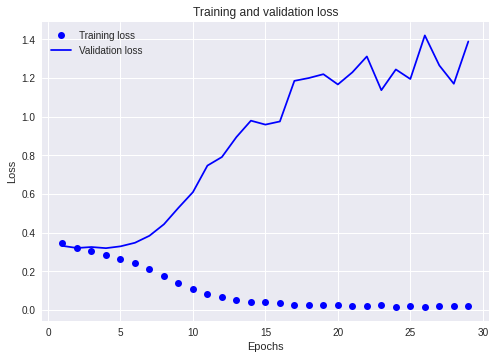

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

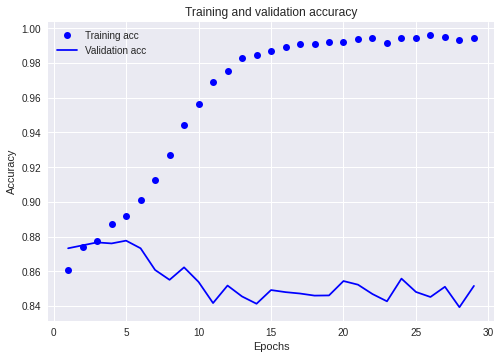

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ab = AdaBoostClassifier()
classifier_ab.fit(X_train_final,y_train)
y_ab=classifier_ab.predict(X_test_final)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_ab)

array([[6850,  173],
       [ 948,  261]])

In [ ]:
print(classification_report(y_test, y_ab))
print('Accuracy Score : ',accuracy_score(y_test, y_ab))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      7023
           1       0.60      0.22      0.32      1209

    accuracy                           0.86      8232
   macro avg       0.74      0.60      0.62      8232
weighted avg       0.84      0.86      0.84      8232

Accuracy Score :  0.863824101068999


In [ ]:
y_test

27364     0
132495    0
57139     0
113498    1
122074    1
         ..
80792     0
49139     0
36256     0
101713    0
66349     0
Name: RainTomorrow, Length: 8232, dtype: int64

In [ ]:
y_ab

array([0, 0, 0, ..., 0, 0, 0])

#Gradient Boosting 


In [ ]:
classifier_gb = GradientBoostingClassifier()
classifier_gb.fit(X_train_final,y_train)
y_gb=classifier_gb.predict(X_test_final)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_gb)

array([[6889,  134],
       [ 998,  211]])

In [ ]:
print(classification_report(y_test, y_gb))
print('Accuracy Score : ',accuracy_score(y_test, y_gb))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7023
           1       0.61      0.17      0.27      1209

    accuracy                           0.86      8232
   macro avg       0.74      0.58      0.60      8232
weighted avg       0.84      0.86      0.83      8232

Accuracy Score :  0.8624878522837707


In [ ]:
y_gb

array([0, 0, 0, ..., 0, 0, 0])

#XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train_final,y_train)
y_xgb=classifier_xgb.predict(X_test_final)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_xgb)

array([[6907,  116],
       [1020,  189]])

In [ ]:
print(classification_report(y_test, y_xgb))
print('Accuracy Score : ',accuracy_score(y_test, y_xgb))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      7023
           1       0.62      0.16      0.25      1209

    accuracy                           0.86      8232
   macro avg       0.75      0.57      0.59      8232
weighted avg       0.83      0.86      0.82      8232

Accuracy Score :  0.8620019436345967


In [ ]:
ada_new = accuracy_score(y_test, y_ab)
grad_new = accuracy_score(y_test, y_gb)
xgb_new = accuracy_score(y_test, y_xgb)
ann_new = 0.8764

In [ ]:
ada_new

0.863824101068999

In [ ]:
grad_new

0.8624878522837707

In [ ]:
xgb_new

0.8620019436345967

In [ ]:
ann_new

0.8764

In [ ]:
y_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pandas as pd
datass = [['AdaBoost', ada_new], ['Gradient Boosting', grad_new], ['XGBoosting', xgb_new], ['Artificial Neural Network', ann_new]]
data_frame = pd.DataFrame(datass, columns = ['Algorithm', 'Percentage'])


In [ ]:
data_frame

,Algorithm,Percentage
0,AdaBoost,0.863824
1,Gradient Boosting,0.862488
2,XGBoosting,0.862002
3,Artificial Neural Network,0.876400


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Algorithm   4 non-null      object 
 1   Percentage  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [ ]:
j=0
def figure():
    global j
    j+=1
    return 'fig_'+str(j)

In [ ]:
ca_vars = [i for i in data_frame.columns]

In [ ]:
import plotly.express as px
for i in ca_vars[:-1]:
    fig=figure()
    fig= px.histogram(data_frame, x=i,title=f"fig_{j}: Frequency of {i}")
    fig.update_xaxes(categoryorder='total descending')
    fig.show()

Text(0.5, 1.0, 'Accuracy Percentage of various algorithms')

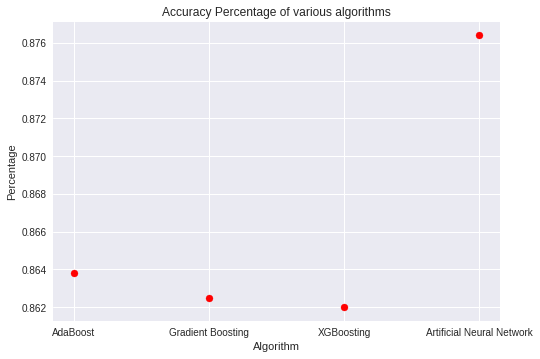

In [ ]:
plt.scatter(data_frame['Algorithm'], data_frame['Percentage'],color=['r'])
plt.xlabel('Algorithm')
plt.ylabel('Percentage')
plt.title('Accuracy Percentage of various algorithms')

#Histogram

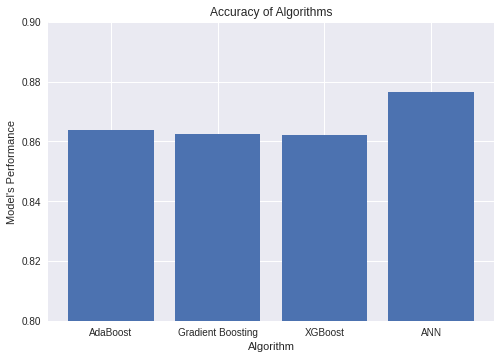

In [ ]:
import matplotlib.pyplot as plt
 
year = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'ANN']
unit = [0.863824101068999, 0.8624878522837707, 0.8620019436345967, 0.8764]
 
# Plot the bar graph
plot = plt.bar(year, unit)
plt.ylim(0.8, 0.9)

# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    
# Add labels and title
plt.title("Accuracy of Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Model's Performance")
plt.show()

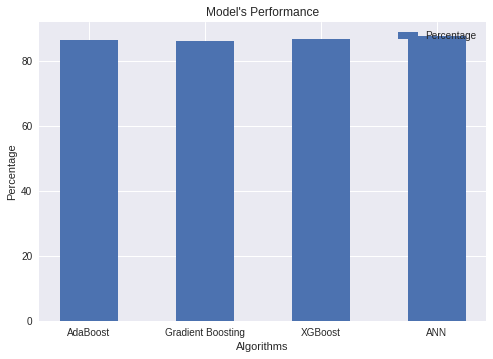

In [ ]:
w = 0.5
g = ["AdaBoost", "Gradient Boosting", "XGBoost", "ANN"]
valu = [86.32,86.24, 86.6, 87.64]
plt.bar(g, valu, w, label = "Percentage")
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Model's Performance")
# plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')
plt.legend(loc='best')
plt.show()